In [1]:
# pip install fbprophet

In [2]:
# pip install pystan==2.19.1.1

In [3]:
import prophet
import pandas as pd

In [20]:
df=pd.read_csv('./Datos/BeerWineLiquor.csv',index_col='date',parse_dates=True)

In [21]:
df.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [6]:
# df.columns=['ds','y']


In [7]:
# df.dtypes

In [8]:
# df.head()

In [9]:
# df['ds']=pd.to_datetime(df['ds'],format="%d/%m/%Y")

In [10]:
# modelo=prophet.Prophet()

In [11]:
# modelo.fit(df)

In [12]:
# predicciones=modelo.make_future_dataframe(periods=10,freq='MS')

In [13]:
# predicciones.head()

In [14]:
# pronostico=modelo.predict(predicciones)

In [15]:
### Redes Neuronales

<AxesSubplot:xlabel='date'>

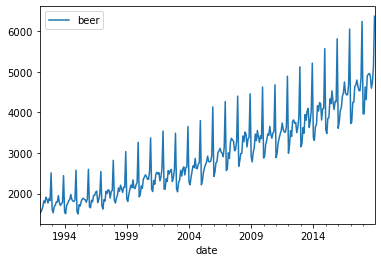

In [22]:
df.plot()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='date'>

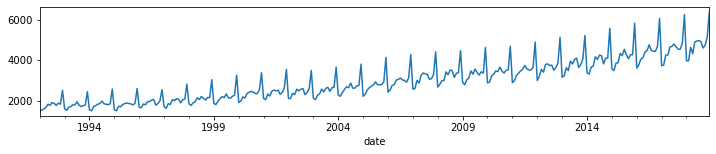

In [25]:
results = seasonal_decompose(df['beer'])
results.observed.plot(figsize=(12,2))

<AxesSubplot:xlabel='date'>

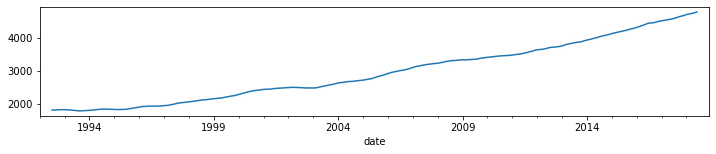

In [26]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='date'>

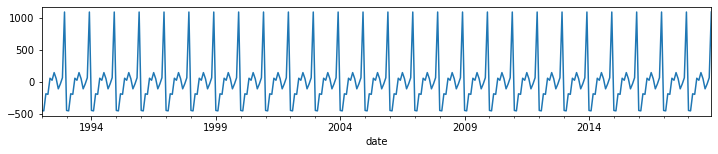

In [27]:
results.seasonal.plot(figsize=(12,2))

In [32]:
train=df.iloc[:len(df)-48]
test=df.iloc[len(df)-48:]

In [29]:
## Escalar los datos
from sklearn.preprocessing import MinMaxScaler
escalador=MinMaxScaler()

In [30]:
escalador.fit(train)

MinMaxScaler()

In [33]:
escalado_train=escalador.transform(train)
escalado_test=escalador.transform(test)

In [37]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: certifi>=2017.4.17 in c:\users\daniel montes\anaconda3\lib\site-packages (from requests<3,>=2.21.0->tensorboard<2.12,>=2.11->tensorflow-intel==2.11.0->tensorflow) (2021.10.8)



In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
n_input=2
n_variables=1
generador=TimeseriesGenerator(escalado_train,escalado_train,length=n_input,batch_size=1)

In [40]:
## para ver el primer batch
generador[0]

(array([[[-0.68317175],
         [-0.67209141]]]),
 array([[-0.65270083]]))

In [41]:
n_input=12
n_variables=1
generador_anyo=TimeseriesGenerator(escalado_train,escalado_train,length=n_input,batch_size=1)

In [42]:
generador_anyo[0]

(array([[[-0.68317175],
         [-0.67209141],
         [-0.65270083],
         [-0.62569252],
         [-0.57479224],
         [-0.59106648],
         [-0.54362881],
         [-0.56094183],
         [-0.59279778],
         [-0.55401662],
         [-0.5716759 ],
         [-0.33621884]]]),
 array([[-0.6468144]]))

In [43]:
## Creando nuestro porpio modelo
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [45]:
## Definimos nuestro modelo
modelo=Sequential()
modelo.add(LSTM(100,activation='relu',input_shape=(n_input,n_variables)))
modelo.add(Dense(1))
modelo.compile(optimizer="adam",loss="mse")
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
modelo.fit_generator(generador_anyo,epochs=10)

C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_9332\950611784.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelo.fit_generator(generador_anyo,epochs=10)


Epoch 1/10
264/264 [==============================] - 3s 12ms/step - loss: 0.0154
Epoch 2/10
264/264 [==============================] - 3s 11ms/step - loss: 0.0132
Epoch 3/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0117
Epoch 4/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0114
Epoch 5/10
264/264 [==============================] - 4s 13ms/step - loss: 0.0100
Epoch 6/10
264/264 [==============================] - 3s 12ms/step - loss: 0.0096
Epoch 7/10
264/264 [==============================] - 5s 18ms/step - loss: 0.0051
Epoch 8/10
264/264 [==============================] - 4s 14ms/step - loss: 0.0037
Epoch 9/10
264/264 [==============================] - 3s 11ms/step - loss: 0.0026
Epoch 10/10
264/264 [==============================] - 4s 15ms/step - loss: 0.0018


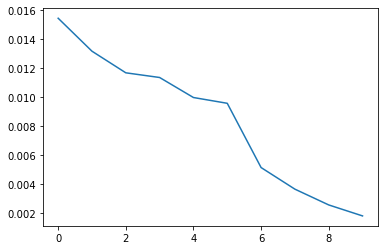

In [48]:
import matplotlib.pyplot as plt
loss_por_epoch=modelo.history.history["loss"]
plt.plot(range(len(loss_por_epoch)),loss_por_epoch)

In [ ]:
## Evaluacion

In [60]:
test_prediccion=[]
evaluacion_batch=escalado_train[-n_input:]
actual_batch=evaluacion_batch.reshape((1,n_input,n_variables))

In [55]:
actual_batch

array([[[-0.0349723 ],
        [-0.05955679],
        [ 0.05886427],
        [ 0.07617729],
        [ 0.23649584],
        [ 0.19182825],
        [ 0.26315789],
        [ 0.25519391],
        [ 0.11495845],
        [ 0.21052632],
        [ 0.2150277 ],
        [ 0.72368421]]])

In [58]:
a=modelo.predict(actual_batch)[0]

1/1 [==============================] - 0s 77ms/step


In [59]:
a

array([-0.01138819], dtype=float32)

In [61]:
import numpy as np
for i in range(len(escalado_test)):
    print(i)
    actual_pred=modelo.predict(actual_batch)[0]
    test_prediccion.append(actual_pred)
    actual_batch=np.append(actual_batch[:,1:,:],[[actual_pred]],axis=1)

0
1/1 [==============================] - 0s 169ms/step
1
1/1 [==============================] - 0s 185ms/step
2
1/1 [==============================] - 0s 131ms/step
3
1/1 [==============================] - 0s 104ms/step
4
1/1 [==============================] - 0s 122ms/step
5
1/1 [==============================] - 0s 87ms/step
6
1/1 [==============================] - 0s 78ms/step
7
1/1 [==============================] - 0s 76ms/step
8
1/1 [==============================] - 0s 102ms/step
9
1/1 [==============================] - 0s 75ms/step
10
1/1 [==============================] - 0s 78ms/step
11
1/1 [==============================] - 0s 79ms/step
12
1/1 [==============================] - 0s 50ms/step
13
1/1 [==============================] - 0s 71ms/step
14
1/1 [==============================] - 0s 37ms/step
15
1/1 [==============================] - 0s 94ms/step
16
1/1 [==============================] - 0s 89ms/step
17
1/1 [==============================] - 0s 82ms/step
18
1/1 [======

In [62]:
test_prediccion

[array([-0.01138819], dtype=float32),
 array([-0.00854438], dtype=float32),
 array([0.10543183], dtype=float32),
 array([0.13504876], dtype=float32),
 array([0.22788076], dtype=float32),
 array([0.21291108], dtype=float32),
 array([0.2532912], dtype=float32),
 array([0.25187427], dtype=float32),
 array([0.17424329], dtype=float32),
 array([0.23581557], dtype=float32),
 array([0.2556404], dtype=float32),
 array([0.5419956], dtype=float32),
 array([0.0371272], dtype=float32),
 array([0.05744901], dtype=float32),
 array([0.15442261], dtype=float32),
 array([0.1825208], dtype=float32),
 array([0.23630677], dtype=float32),
 array([0.23049943], dtype=float32),
 array([0.25358054], dtype=float32),
 array([0.25361958], dtype=float32),
 array([0.21019654], dtype=float32),
 array([0.25036752], dtype=float32),
 array([0.26465648], dtype=float32),
 array([0.4232395], dtype=float32),
 array([0.09555537], dtype=float32),
 array([0.12394366], dtype=float32),
 array([0.19595426], dtype=float32),
 arra

In [63]:
escalador.inverse_transform(test_prediccion)

array([[3449.11092047],
       [3457.32382025],
       [3786.48713189],
       [3872.02082455],
       [4140.11963785],
       [4096.88721144],
       [4213.50495577],
       [4209.41288614],
       [3985.2146107 ],
       [4163.03536546],
       [4220.2894392 ],
       [5047.28324938],
       [3589.22336584],
       [3647.91273877],
       [3927.97250056],
       [4009.12009001],
       [4164.45395648],
       [4147.68235815],
       [4214.34060073],
       [4214.45335126],
       [4089.04760683],
       [4205.06140423],
       [4246.32792616],
       [4704.31567407],
       [3757.96391588],
       [3839.9492805 ],
       [4047.91591215],
       [4110.35986698],
       [4199.82655203],
       [4190.92532802],
       [4228.93774915],
       [4229.9834888 ],
       [4160.34441483],
       [4235.12052345],
       [4260.89081907],
       [4504.12314844],
       [3922.78726721],
       [3999.52764499],
       [4139.99892592],
       [4183.42806327],
       [4233.8549633 ],
       [4227.540

In [64]:
test

,beer
date,
2015-01-01,3572
2015-02-01,3482
2015-03-01,3857
2015-04-01,3867
2015-05-01,4335
2015-06-01,4217
2015-07-01,4532
2015-08-01,4260
2015-09-01,4073


In [65]:
test["prediccion"]=escalador.inverse_transform(test_prediccion)

C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_9332\1636041146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediccion"]=escalador.inverse_transform(test_prediccion)


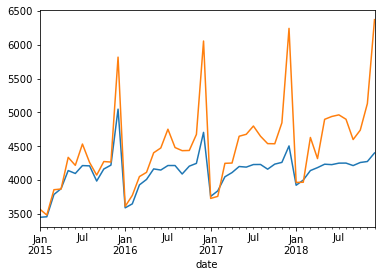

In [66]:
test.prediccion.plot()
test.beer.plot()
plt.show()